In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [2]:
#Load the dataset
df = pd.read_csv(r'C:\Users\Downloads\cars.csv')
#Copy the dataframe
df_new= df.copy()
df_new.head()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2.0,4,180,8 Seater,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,4 Seater,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,5 Seater,honda,ksa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB


In [12]:
# Replace 'NaN' or 'N/A' with NaN for consistency
df.replace(['NaN', 'N/A', 'TBD'], pd.NA, inplace=True)

# Clean 'Engine Capacity' column
df['engine_capacity'] = pd.to_numeric(df['engine_capacity'], errors='coerce')

# Clean 'Cylinder' column
df['cylinder'] = pd.to_numeric(df['cylinder'], errors='coerce')

# Clean 'Horse Power' column
df['horse_power'] = pd.to_numeric(df['horse_power'], errors='coerce')

# Clean 'Top Speed' column
df['top_speed'] = pd.to_numeric(df['top_speed'], errors='coerce')


# Drop rows where essential numeric columns have NaN values
essential_columns = ['price', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats']
df.dropna(subset=essential_columns, inplace=True)

# Strip leading/trailing whitespaces from 'car name', 'brand', 'country'
df['car name'] = df['car name'].str.strip()
df['brand'] = df['brand'].str.strip()
df['country'] = df['country'].str.strip()

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Display cleaned DataFrame
df.head()


,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Suzuki Jimny 2021 1.5L Automatic,98785.0,1.5,4.0,102.0,145.0,4.0,suzuki,ksa
1,Honda HR-V 2021 1.8 i-VTEC EX,95335.0,1.8,4.0,140.0,190.0,5.0,honda,ksa
2,Renault Koleos 2021 2.5L LE (4WD),116900.0,2.5,4.0,170.0,199.0,5.0,renault,ksa
3,Suzuki Jimny 2021 1.5L M/T,91885.0,1.5,4.0,102.0,145.0,4.0,suzuki,ksa
4,Honda HR-V 2021 1.8 i-VTEC DX,72335.0,1.8,4.0,140.0,190.0,5.0,honda,ksa


In [ ]:
# Clean 'Price' column
df['price'] = df['price'].str.replace('[^\d.]', '', regex=True).astype(float)
# Clean 'Seats' column
df['seats'] = pd.to_numeric(df['seats'].str.extract('(\d+)')[0], errors='coerce')



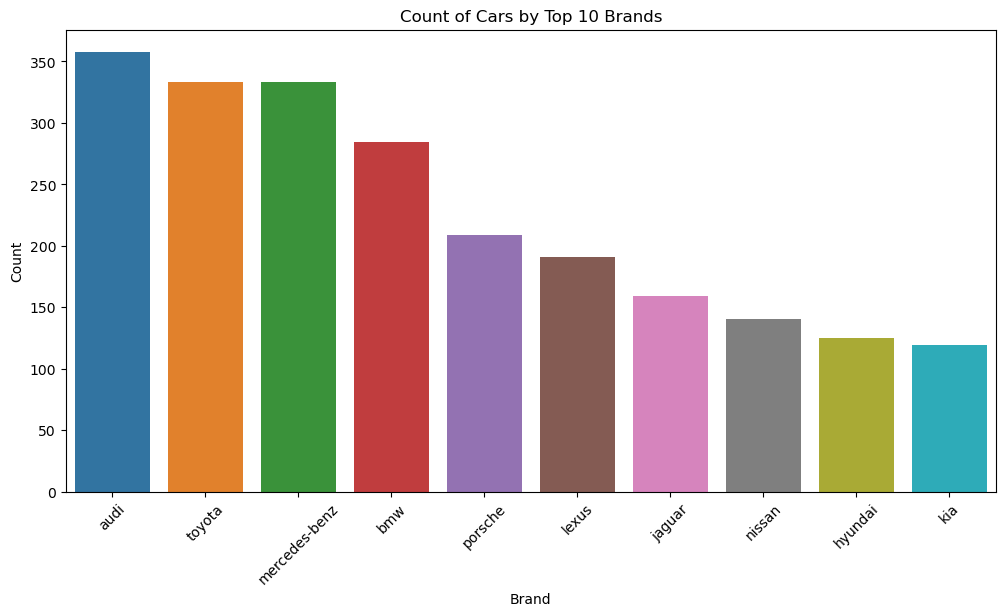

In [13]:
top_10_brands = df['brand'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 brands
df_top_10 = df[df['brand'].isin(top_10_brands)]

# Count of Cars by Brand for Top 10 Brands
plt.figure(figsize=(12, 6))
sns.countplot(x='brand', data=df_top_10, order=df_top_10['brand'].value_counts().index, palette='tab10')
plt.title('Count of Cars by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

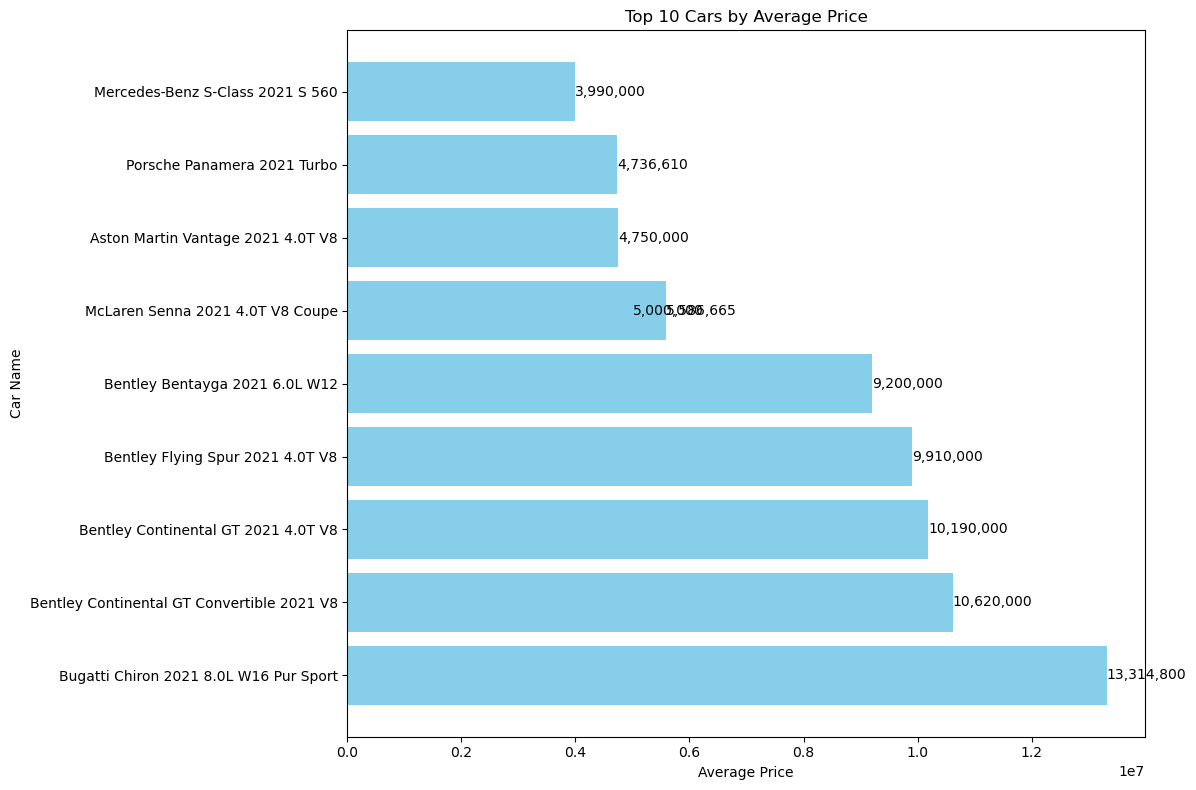

In [39]:
# Sort data by average price to get top 10 cars
top_10_cars = df.nlargest(10, 'price')

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_cars['car name'], top_10_cars['price'], color='skyblue')

# Adding labels and title
plt.xlabel('Average Price')
plt.ylabel('Car Name')
plt.title('Top 10 Cars by Average Price')

# Adding data labels
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
             va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

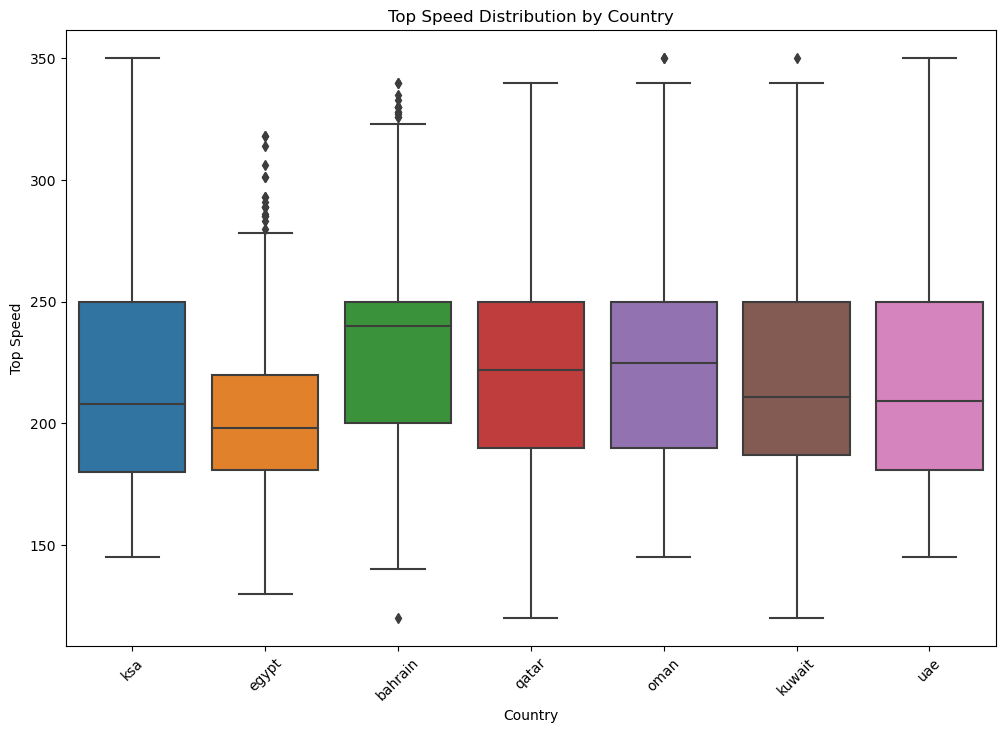

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='country', y='top_speed')
plt.title('Top Speed Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()


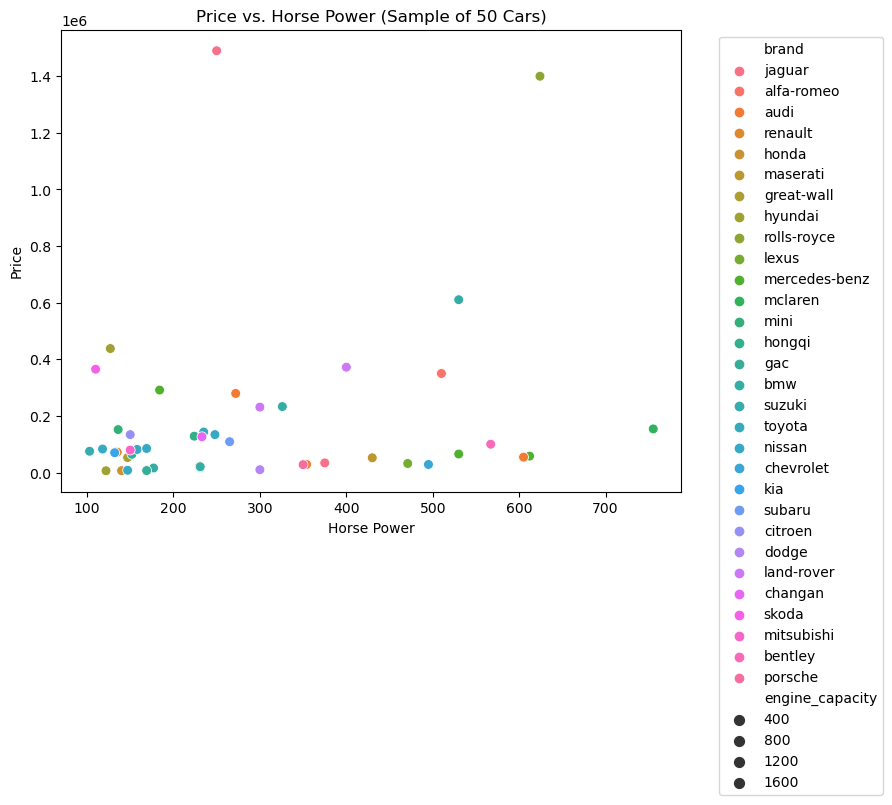

In [49]:


subset_df = df.sample(n=50, random_state=42)  # Selecting a random subset of 50 cars

plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_df, x='horse_power', y='price', hue='brand', size='engine_capacity', sizes=(50, 50))
plt.title('Price vs. Horse Power (Sample of 50 Cars)')
plt.xlabel('Horse Power')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


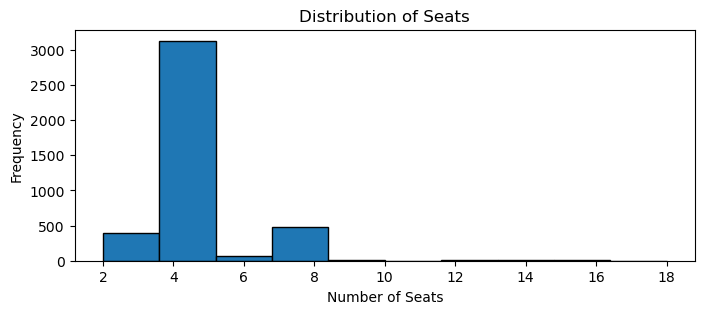

In [44]:
plt.figure(figsize=(8, 3))
plt.hist(df['seats'], bins=10, edgecolor='black')
plt.title('Distribution of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()
